# CS5756 Final Project: Safe Reinforcement Learning with Behavioral Cloning

## 1. Imports
Import the required libraries for the experiment

In [1]:
%load_ext autoreload
%autoreload 2

import os.path
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import PPO

from scripts.PPOActor import PPOActor
from scripts.PPOCallback import PPOCallback
from scripts.SafeLunarLanderWrapper import SafeLunarLanderWrapper
from scripts.SafeUtils import reseed, visualize, evaluate_policy

## 2. Define Constants
Define the required constants for the experiment

In [2]:
BASE_MODEL_CKPT = os.path.join("models", "ppo_base_lunar_lander")
SAFE_MODEL_CKPT = os.path.join("models", "ppo_safe_lunar_lander")
WIND_MODEL_CKPT = os.path.join("models", "ppo_wind_lunar_lander")

BASE_ACTOR_VIDEO = os.path.join("videos", "base_expert")
SAFE_ACTOR_VIDEO = os.path.join("videos", "safe_expert")
WIND_ACTOR_VIDEO = os.path.join("videos", "wind_model")

BASE_LEARN_PLOT = os.path.join("plots", "base_learning")
SAFE_LEARN_PLOT = os.path.join("plots", "safe_learning")
WIND_LEARN_PLOT = os.path.join("plots", "wind_learning")

In [3]:
SEED = 24
WIND_POWER = 20.0
TRAIN_TIMESTEPS = 1000000
ADDITIONAL_TRAIN_TIMESTEPS = 250000

## 3. Create Environments
Create the base and safe lunar lander environments

In [4]:
# Create Base and Safe Lander Environments
reseed(SEED)
vec_env_base_lander_10 = make_vec_env('LunarLander-v2', n_envs=10) # Base Environment
vec_env_base_lander_1 = make_vec_env('LunarLander-v2', n_envs=1) # Base Environment

vec_env_safe_lander_10 = make_vec_env('LunarLander-v2', n_envs=10, wrapper_class=SafeLunarLanderWrapper) # Safe Environment
vec_env_safe_lander_1 = make_vec_env('LunarLander-v2', n_envs=1, wrapper_class=SafeLunarLanderWrapper) # Safe Environment

## 4. Train Expert Policies

In [5]:
# Training Base Expert Policy on Base Environment
base_model = PPO("MlpPolicy", vec_env_base_lander_10, verbose=1)
base_model_callback = PPOCallback(save_path=BASE_MODEL_CKPT, eval_env=vec_env_base_lander_1, save_path_plot=BASE_LEARN_PLOT) 

# Training Safe Expert Policy on Safe Environment
safe_model = PPO("MlpPolicy", vec_env_safe_lander_10, verbose=1)
safe_model_callback = PPOCallback(save_path=SAFE_MODEL_CKPT, eval_env=vec_env_safe_lander_1, save_path_plot=SAFE_LEARN_PLOT)

Using cpu device
Using cpu device


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 93.8     |
|    ep_rew_mean     | -193     |
| time/              |          |
|    fps             | 11355    |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 20480    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95.7        |
|    ep_rew_mean          | -124        |
| time/                   |             |
|    fps                  | 6642        |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.011400821 |
|    clip_fraction        | 0.0821      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.00237     |
|    learning_rate        | 0.

100%|██████████| 20/20 [00:00<00:00, 49.54it/s]


evaluating self.num_timesteps=50000, mean_reward=-98.28022766113281=======
model saved on eval reward: -98.28022766113281
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 108        |
|    ep_rew_mean          | -100       |
| time/                   |            |
|    fps                  | 5250       |
|    iterations           | 3          |
|    time_elapsed         | 11         |
|    total_timesteps      | 61440      |
| train/                  |            |
|    approx_kl            | 0.01108305 |
|    clip_fraction        | 0.117      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.35      |
|    explained_variance   | 0.418      |
|    learning_rate        | 0.0003     |
|    loss                 | 111        |
|    n_updates            | 20         |
|    policy_gradient_loss | -0.0117    |
|    value_loss           | 333        |
----------------------------------------
-----------------

100%|██████████| 20/20 [00:00<00:00, 35.08it/s]


evaluating self.num_timesteps=100000, mean_reward=-56.31926727294922=======
model saved on eval reward: -56.31926727294922
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 124         |
|    ep_rew_mean          | -63.5       |
| time/                   |             |
|    fps                  | 4787        |
|    iterations           | 5           |
|    time_elapsed         | 21          |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.015489417 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.631       |
|    learning_rate        | 0.0003      |
|    loss                 | 52.7        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 179         |
-------------------------------------

100%|██████████| 20/20 [00:02<00:00,  7.17it/s]


evaluating self.num_timesteps=150000, mean_reward=9.308133125305176=======
model saved on eval reward: 9.308133125305176
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 218         |
|    ep_rew_mean          | -22.9       |
| time/                   |             |
|    fps                  | 3857        |
|    iterations           | 8           |
|    time_elapsed         | 42          |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.011950949 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 0.906       |
|    learning_rate        | 0.0003      |
|    loss                 | 20          |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 51.5        |
---------------------------------------

100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


evaluating self.num_timesteps=200000, mean_reward=41.67698287963867=======
model saved on eval reward: 41.67698287963867
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 405         |
|    ep_rew_mean          | 6.07        |
| time/                   |             |
|    fps                  | 2686        |
|    iterations           | 10          |
|    time_elapsed         | 76          |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.009582704 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 26.8        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00798    |
|    value_loss           | 45.3        |
---------------------------------------

100%|██████████| 20/20 [00:12<00:00,  1.65it/s]


evaluating self.num_timesteps=250000, mean_reward=89.11363220214844=======
model saved on eval reward: 89.11363220214844
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 748         |
|    ep_rew_mean          | 65.5        |
| time/                   |             |
|    fps                  | 2024        |
|    iterations           | 13          |
|    time_elapsed         | 131         |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.007196229 |
|    clip_fraction        | 0.0753      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.991      |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.9        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0047     |
|    value_loss           | 25.3        |
---------------------------------------

100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


evaluating self.num_timesteps=300000, mean_reward=116.34334564208984=======
model saved on eval reward: 116.34334564208984
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 897          |
|    ep_rew_mean          | 90.2         |
| time/                   |              |
|    fps                  | 1760         |
|    iterations           | 15           |
|    time_elapsed         | 174          |
|    total_timesteps      | 307200       |
| train/                  |              |
|    approx_kl            | 0.0068532974 |
|    clip_fraction        | 0.0745       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.944       |
|    explained_variance   | 0.947        |
|    learning_rate        | 0.0003       |
|    loss                 | 10           |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.00383     |
|    value_loss           | 14           |
-----------------

100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


evaluating self.num_timesteps=350000, mean_reward=109.3475112915039=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 875         |
|    ep_rew_mean          | 114         |
| time/                   |             |
|    fps                  | 1597        |
|    iterations           | 18          |
|    time_elapsed         | 230         |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.007957578 |
|    clip_fraction        | 0.0756      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.915      |
|    explained_variance   | 0.905       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.5        |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.00372    |
|    value_loss           | 27          |
-----------------------------------------
------------------------------------------


100%|██████████| 20/20 [00:09<00:00,  2.16it/s]


evaluating self.num_timesteps=400000, mean_reward=152.9236602783203=======
model saved on eval reward: 152.9236602783203
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 792         |
|    ep_rew_mean          | 132         |
| time/                   |             |
|    fps                  | 1543        |
|    iterations           | 20          |
|    time_elapsed         | 265         |
|    total_timesteps      | 409600      |
| train/                  |             |
|    approx_kl            | 0.005392412 |
|    clip_fraction        | 0.0808      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.799      |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.68        |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0022     |
|    value_loss           | 38.5        |
---------------------------------------

100%|██████████| 20/20 [00:04<00:00,  4.22it/s]


evaluating self.num_timesteps=450000, mean_reward=218.80294799804688=======
model saved on eval reward: 218.80294799804688
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 678         |
|    ep_rew_mean          | 177         |
| time/                   |             |
|    fps                  | 1538        |
|    iterations           | 22          |
|    time_elapsed         | 292         |
|    total_timesteps      | 450560      |
| train/                  |             |
|    approx_kl            | 0.011679666 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.707      |
|    explained_variance   | 0.777       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.84        |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00448    |
|    value_loss           | 93.3        |
-------------------------------------

100%|██████████| 20/20 [00:04<00:00,  4.13it/s]


evaluating self.num_timesteps=500000, mean_reward=205.9419708251953=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 456         |
|    ep_rew_mean          | 212         |
| time/                   |             |
|    fps                  | 1562        |
|    iterations           | 25          |
|    time_elapsed         | 327         |
|    total_timesteps      | 512000      |
| train/                  |             |
|    approx_kl            | 0.006115099 |
|    clip_fraction        | 0.0739      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.752      |
|    explained_variance   | 0.779       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.2        |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.00199    |
|    value_loss           | 84.7        |
-----------------------------------------
-----------------------------------------
|

100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


evaluating self.num_timesteps=550000, mean_reward=212.2393798828125=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 445          |
|    ep_rew_mean          | 215          |
| time/                   |              |
|    fps                  | 1569         |
|    iterations           | 27           |
|    time_elapsed         | 352          |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0065930127 |
|    clip_fraction        | 0.0673       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.735       |
|    explained_variance   | 0.866        |
|    learning_rate        | 0.0003       |
|    loss                 | 11.5         |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00192     |
|    value_loss           | 66.1         |
------------------------------------------
----------------------

100%|██████████| 20/20 [00:03<00:00,  6.13it/s]


evaluating self.num_timesteps=600000, mean_reward=241.9884490966797=======
model saved on eval reward: 241.9884490966797
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 409         |
|    ep_rew_mean          | 223         |
| time/                   |             |
|    fps                  | 1602        |
|    iterations           | 30          |
|    time_elapsed         | 383         |
|    total_timesteps      | 614400      |
| train/                  |             |
|    approx_kl            | 0.004203379 |
|    clip_fraction        | 0.048       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.705      |
|    explained_variance   | 0.913       |
|    learning_rate        | 0.0003      |
|    loss                 | 51          |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.000691   |
|    value_loss           | 54.6        |
---------------------------------------

100%|██████████| 20/20 [00:03<00:00,  5.93it/s]


evaluating self.num_timesteps=650000, mean_reward=223.594482421875=======
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 363        |
|    ep_rew_mean          | 230        |
| time/                   |            |
|    fps                  | 1623       |
|    iterations           | 32         |
|    time_elapsed         | 403        |
|    total_timesteps      | 655360     |
| train/                  |            |
|    approx_kl            | 0.00475995 |
|    clip_fraction        | 0.0454     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.674     |
|    explained_variance   | 0.875      |
|    learning_rate        | 0.0003     |
|    loss                 | 61.5       |
|    n_updates            | 310        |
|    policy_gradient_loss | -0.00163   |
|    value_loss           | 77.2       |
----------------------------------------
------------------------------------------
| rollout/            

100%|██████████| 20/20 [00:02<00:00,  7.83it/s]


evaluating self.num_timesteps=700000, mean_reward=240.607421875=======
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 294        |
|    ep_rew_mean          | 253        |
| time/                   |            |
|    fps                  | 1665       |
|    iterations           | 35         |
|    time_elapsed         | 430        |
|    total_timesteps      | 716800     |
| train/                  |            |
|    approx_kl            | 0.00440283 |
|    clip_fraction        | 0.0529     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.68      |
|    explained_variance   | 0.822      |
|    learning_rate        | 0.0003     |
|    loss                 | 13.1       |
|    n_updates            | 340        |
|    policy_gradient_loss | -0.000878  |
|    value_loss           | 61.5       |
----------------------------------------
-----------------------------------------
| rollout/                

100%|██████████| 20/20 [00:02<00:00,  7.36it/s]


evaluating self.num_timesteps=750000, mean_reward=247.84951782226562=======
model saved on eval reward: 247.84951782226562
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 318          |
|    ep_rew_mean          | 256          |
| time/                   |              |
|    fps                  | 1686         |
|    iterations           | 37           |
|    time_elapsed         | 449          |
|    total_timesteps      | 757760       |
| train/                  |              |
|    approx_kl            | 0.0052498644 |
|    clip_fraction        | 0.0592       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.634       |
|    explained_variance   | 0.952        |
|    learning_rate        | 0.0003       |
|    loss                 | 23.2         |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.00114     |
|    value_loss           | 33.3         |
-----------------

100%|██████████| 20/20 [00:02<00:00,  8.40it/s]


evaluating self.num_timesteps=800000, mean_reward=258.41351318359375=======
model saved on eval reward: 258.41351318359375
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 320         |
|    ep_rew_mean          | 257         |
| time/                   |             |
|    fps                  | 1724        |
|    iterations           | 40          |
|    time_elapsed         | 474         |
|    total_timesteps      | 819200      |
| train/                  |             |
|    approx_kl            | 0.004481136 |
|    clip_fraction        | 0.0532      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.617      |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.65        |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.000768   |
|    value_loss           | 22.4        |
-------------------------------------

100%|██████████| 20/20 [00:02<00:00,  9.69it/s]


evaluating self.num_timesteps=850000, mean_reward=254.0419464111328=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 314          |
|    ep_rew_mean          | 256          |
| time/                   |              |
|    fps                  | 1746         |
|    iterations           | 42           |
|    time_elapsed         | 492          |
|    total_timesteps      | 860160       |
| train/                  |              |
|    approx_kl            | 0.0057880604 |
|    clip_fraction        | 0.0653       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.625       |
|    explained_variance   | 0.976        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.47         |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000685    |
|    value_loss           | 17.6         |
------------------------------------------
----------------------

100%|██████████| 20/20 [00:02<00:00,  8.32it/s]


evaluating self.num_timesteps=900000, mean_reward=256.4287414550781=======
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 282        |
|    ep_rew_mean          | 264        |
| time/                   |            |
|    fps                  | 1771       |
|    iterations           | 44         |
|    time_elapsed         | 508        |
|    total_timesteps      | 901120     |
| train/                  |            |
|    approx_kl            | 0.00447729 |
|    clip_fraction        | 0.0531     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.58      |
|    explained_variance   | 0.95       |
|    learning_rate        | 0.0003     |
|    loss                 | 5.51       |
|    n_updates            | 430        |
|    policy_gradient_loss | -0.000902  |
|    value_loss           | 19.9       |
----------------------------------------
-----------------------------------------
| rollout/            

100%|██████████| 20/20 [00:01<00:00, 15.83it/s]


evaluating self.num_timesteps=950000, mean_reward=257.8134765625=======
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 287        |
|    ep_rew_mean          | 266        |
| time/                   |            |
|    fps                  | 1809       |
|    iterations           | 47         |
|    time_elapsed         | 531        |
|    total_timesteps      | 962560     |
| train/                  |            |
|    approx_kl            | 0.00477792 |
|    clip_fraction        | 0.0529     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.579     |
|    explained_variance   | 0.966      |
|    learning_rate        | 0.0003     |
|    loss                 | 6.43       |
|    n_updates            | 460        |
|    policy_gradient_loss | -0.000197  |
|    value_loss           | 20.6       |
----------------------------------------
----------------------------------------
| rollout/                

100%|██████████| 20/20 [00:01<00:00, 14.41it/s]


evaluating self.num_timesteps=1000000, mean_reward=275.5252990722656=======
model saved on eval reward: 275.5252990722656
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 241          |
|    ep_rew_mean          | 275          |
| time/                   |              |
|    fps                  | 1826         |
|    iterations           | 49           |
|    time_elapsed         | 549          |
|    total_timesteps      | 1003520      |
| train/                  |              |
|    approx_kl            | 0.0052839452 |
|    clip_fraction        | 0.0526       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.587       |
|    explained_variance   | 0.982        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.15         |
|    n_updates            | 480          |
|    policy_gradient_loss | 0.000139     |
|    value_loss           | 12.8         |
------------------

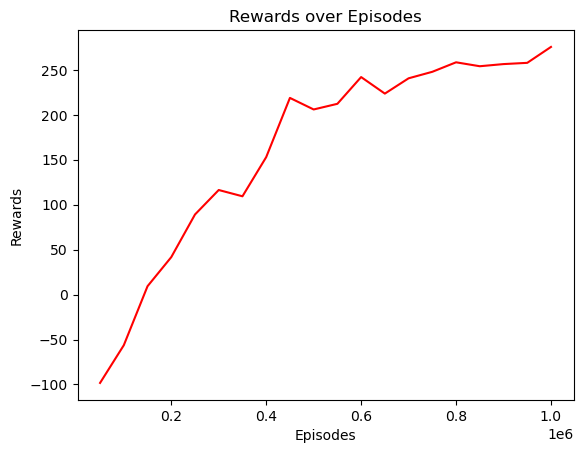

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89.7     |
|    ep_rew_mean     | -183     |
| time/              |          |
|    fps             | 9465     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 20480    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 95.1         |
|    ep_rew_mean          | -156         |
| time/                   |              |
|    fps                  | 6032         |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0072635533 |
|    clip_fraction        | 0.0686       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.00517      |
|    learning_r

100%|██████████| 20/20 [00:00<00:00, 56.26it/s]


evaluating self.num_timesteps=50000, mean_reward=-98.44971466064453=======
model saved on eval reward: -98.44971466064453
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -114        |
| time/                   |             |
|    fps                  | 5159        |
|    iterations           | 3           |
|    time_elapsed         | 11          |
|    total_timesteps      | 61440       |
| train/                  |             |
|    approx_kl            | 0.011084879 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.43        |
|    learning_rate        | 0.0003      |
|    loss                 | 159         |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0109     |
|    value_loss           | 410         |
--------------------------------------

100%|██████████| 20/20 [00:00<00:00, 47.83it/s]


evaluating self.num_timesteps=100000, mean_reward=-65.19454193115234=======
model saved on eval reward: -65.19454193115234
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 116         |
|    ep_rew_mean          | -61.9       |
| time/                   |             |
|    fps                  | 4691        |
|    iterations           | 5           |
|    time_elapsed         | 21          |
|    total_timesteps      | 102400      |
| train/                  |             |
|    approx_kl            | 0.014708633 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.28       |
|    explained_variance   | 0.639       |
|    learning_rate        | 0.0003      |
|    loss                 | 46.3        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 183         |
-------------------------------------

100%|██████████| 20/20 [00:02<00:00,  8.88it/s]


evaluating self.num_timesteps=150000, mean_reward=-47.63118362426758=======
model saved on eval reward: -47.63118362426758
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 235         |
|    ep_rew_mean          | -23.5       |
| time/                   |             |
|    fps                  | 3553        |
|    iterations           | 8           |
|    time_elapsed         | 46          |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.011163123 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.12       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.4        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0121     |
|    value_loss           | 45.2        |
-------------------------------------

100%|██████████| 20/20 [00:11<00:00,  1.81it/s]


evaluating self.num_timesteps=200000, mean_reward=-35.61201095581055=======
model saved on eval reward: -35.61201095581055
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 520         |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 2330        |
|    iterations           | 10          |
|    time_elapsed         | 87          |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.010744616 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.96        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00793    |
|    value_loss           | 24.8        |
-------------------------------------

100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


evaluating self.num_timesteps=250000, mean_reward=36.459815979003906=======
model saved on eval reward: 36.459815979003906
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 819         |
|    ep_rew_mean          | 73          |
| time/                   |             |
|    fps                  | 1776        |
|    iterations           | 13          |
|    time_elapsed         | 149         |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.011615159 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.98        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00669    |
|    value_loss           | 12.5        |
-------------------------------------

100%|██████████| 20/20 [00:14<00:00,  1.41it/s]


evaluating self.num_timesteps=300000, mean_reward=88.40160369873047=======
model saved on eval reward: 88.40160369873047
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 887         |
|    ep_rew_mean          | 95.9        |
| time/                   |             |
|    fps                  | 1568        |
|    iterations           | 15          |
|    time_elapsed         | 195         |
|    total_timesteps      | 307200      |
| train/                  |             |
|    approx_kl            | 0.008530224 |
|    clip_fraction        | 0.0999      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.07       |
|    explained_variance   | 0.977       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.28        |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00586    |
|    value_loss           | 10.3        |
---------------------------------------

100%|██████████| 20/20 [00:11<00:00,  1.71it/s]


evaluating self.num_timesteps=350000, mean_reward=115.05860900878906=======
model saved on eval reward: 115.05860900878906
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 945          |
|    ep_rew_mean          | 127          |
| time/                   |              |
|    fps                  | 1450         |
|    iterations           | 18           |
|    time_elapsed         | 254          |
|    total_timesteps      | 368640       |
| train/                  |              |
|    approx_kl            | 0.0067077093 |
|    clip_fraction        | 0.0773       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.963       |
|    explained_variance   | 0.983        |
|    learning_rate        | 0.0003       |
|    loss                 | 18.4         |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00401     |
|    value_loss           | 6.51         |
-----------------

100%|██████████| 20/20 [00:11<00:00,  1.73it/s]


evaluating self.num_timesteps=400000, mean_reward=91.7286605834961=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 895          |
|    ep_rew_mean          | 128          |
| time/                   |              |
|    fps                  | 1379         |
|    iterations           | 20           |
|    time_elapsed         | 296          |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0057386593 |
|    clip_fraction        | 0.0716       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.894       |
|    explained_variance   | 0.959        |
|    learning_rate        | 0.0003       |
|    loss                 | 101          |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.00208     |
|    value_loss           | 17           |
------------------------------------------
-----------------------

100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


evaluating self.num_timesteps=450000, mean_reward=100.22388458251953=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 817         |
|    ep_rew_mean          | 128         |
| time/                   |             |
|    fps                  | 1322        |
|    iterations           | 22          |
|    time_elapsed         | 340         |
|    total_timesteps      | 450560      |
| train/                  |             |
|    approx_kl            | 0.006417866 |
|    clip_fraction        | 0.0812      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.849      |
|    explained_variance   | 0.96        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.766       |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00174    |
|    value_loss           | 18          |
-----------------------------------------
------------------------------------------

100%|██████████| 20/20 [00:11<00:00,  1.77it/s]


evaluating self.num_timesteps=500000, mean_reward=129.9392547607422=======
model saved on eval reward: 129.9392547607422
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 824          |
|    ep_rew_mean          | 132          |
| time/                   |              |
|    fps                  | 1288         |
|    iterations           | 25           |
|    time_elapsed         | 397          |
|    total_timesteps      | 512000       |
| train/                  |              |
|    approx_kl            | 0.0071983384 |
|    clip_fraction        | 0.0802       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.815       |
|    explained_variance   | 0.971        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.78         |
|    n_updates            | 240          |
|    policy_gradient_loss | -0.00107     |
|    value_loss           | 12.2         |
-------------------

100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


evaluating self.num_timesteps=550000, mean_reward=132.1490478515625=======
model saved on eval reward: 132.1490478515625
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 881          |
|    ep_rew_mean          | 131          |
| time/                   |              |
|    fps                  | 1256         |
|    iterations           | 27           |
|    time_elapsed         | 440          |
|    total_timesteps      | 552960       |
| train/                  |              |
|    approx_kl            | 0.0071033584 |
|    clip_fraction        | 0.0827       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.799       |
|    explained_variance   | 0.97         |
|    learning_rate        | 0.0003       |
|    loss                 | 0.84         |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00127     |
|    value_loss           | 12.8         |
-------------------

100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


evaluating self.num_timesteps=600000, mean_reward=136.46701049804688=======
model saved on eval reward: 136.46701049804688
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 878         |
|    ep_rew_mean          | 136         |
| time/                   |             |
|    fps                  | 1226        |
|    iterations           | 30          |
|    time_elapsed         | 501         |
|    total_timesteps      | 614400      |
| train/                  |             |
|    approx_kl            | 0.007339643 |
|    clip_fraction        | 0.0661      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.748      |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.2        |
|    n_updates            | 290         |
|    policy_gradient_loss | -0.000506   |
|    value_loss           | 20.4        |
-------------------------------------

100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


evaluating self.num_timesteps=650000, mean_reward=157.99993896484375=======
model saved on eval reward: 157.99993896484375
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 938         |
|    ep_rew_mean          | 139         |
| time/                   |             |
|    fps                  | 1203        |
|    iterations           | 32          |
|    time_elapsed         | 544         |
|    total_timesteps      | 655360      |
| train/                  |             |
|    approx_kl            | 0.008349103 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.718      |
|    explained_variance   | 0.996       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.566       |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.00178    |
|    value_loss           | 0.986       |
-------------------------------------

100%|██████████| 20/20 [00:13<00:00,  1.48it/s]


evaluating self.num_timesteps=700000, mean_reward=133.58468627929688=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 906          |
|    ep_rew_mean          | 146          |
| time/                   |              |
|    fps                  | 1182         |
|    iterations           | 35           |
|    time_elapsed         | 605          |
|    total_timesteps      | 716800       |
| train/                  |              |
|    approx_kl            | 0.0069532543 |
|    clip_fraction        | 0.0676       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.721       |
|    explained_variance   | 0.967        |
|    learning_rate        | 0.0003       |
|    loss                 | 48           |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.000431    |
|    value_loss           | 14.9         |
------------------------------------------
---------------------

100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


evaluating self.num_timesteps=750000, mean_reward=133.5872039794922=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 913         |
|    ep_rew_mean          | 147         |
| time/                   |             |
|    fps                  | 1157        |
|    iterations           | 37          |
|    time_elapsed         | 654         |
|    total_timesteps      | 757760      |
| train/                  |             |
|    approx_kl            | 0.005336859 |
|    clip_fraction        | 0.0717      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.714      |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.799       |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00148    |
|    value_loss           | 5.93        |
-----------------------------------------
-----------------------------------------
|

100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


evaluating self.num_timesteps=800000, mean_reward=150.72415161132812=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 905         |
|    ep_rew_mean          | 153         |
| time/                   |             |
|    fps                  | 1146        |
|    iterations           | 40          |
|    time_elapsed         | 714         |
|    total_timesteps      | 819200      |
| train/                  |             |
|    approx_kl            | 0.006881485 |
|    clip_fraction        | 0.0867      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.675      |
|    explained_variance   | 0.974       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.69        |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00124    |
|    value_loss           | 14.7        |
-----------------------------------------
-----------------------------------------


100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


evaluating self.num_timesteps=850000, mean_reward=147.17706298828125=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 908          |
|    ep_rew_mean          | 153          |
| time/                   |              |
|    fps                  | 1128         |
|    iterations           | 42           |
|    time_elapsed         | 762          |
|    total_timesteps      | 860160       |
| train/                  |              |
|    approx_kl            | 0.0074335113 |
|    clip_fraction        | 0.0934       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.69        |
|    explained_variance   | 0.981        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.366        |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000993    |
|    value_loss           | 9.08         |
------------------------------------------
---------------------

100%|██████████| 20/20 [00:13<00:00,  1.48it/s]


evaluating self.num_timesteps=900000, mean_reward=154.75991821289062=======
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 934         |
|    ep_rew_mean          | 150         |
| time/                   |             |
|    fps                  | 1114        |
|    iterations           | 44          |
|    time_elapsed         | 808         |
|    total_timesteps      | 901120      |
| train/                  |             |
|    approx_kl            | 0.005380351 |
|    clip_fraction        | 0.0604      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.971       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.152       |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.000931   |
|    value_loss           | 12.8        |
-----------------------------------------
------------------------------------------

100%|██████████| 20/20 [00:13<00:00,  1.52it/s]


evaluating self.num_timesteps=950000, mean_reward=154.17935180664062=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 909          |
|    ep_rew_mean          | 151          |
| time/                   |              |
|    fps                  | 1107         |
|    iterations           | 47           |
|    time_elapsed         | 869          |
|    total_timesteps      | 962560       |
| train/                  |              |
|    approx_kl            | 0.0066036135 |
|    clip_fraction        | 0.0832       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | 0.982        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.104        |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.000364    |
|    value_loss           | 8.92         |
------------------------------------------
---------------------

100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


evaluating self.num_timesteps=1000000, mean_reward=153.7835693359375=======
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 879          |
|    ep_rew_mean          | 148          |
| time/                   |              |
|    fps                  | 1099         |
|    iterations           | 49           |
|    time_elapsed         | 912          |
|    total_timesteps      | 1003520      |
| train/                  |              |
|    approx_kl            | 0.0071047815 |
|    clip_fraction        | 0.0692       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.968        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.05         |
|    n_updates            | 480          |
|    policy_gradient_loss | 0.000436     |
|    value_loss           | 15.1         |
------------------------------------------
model saved on eval r

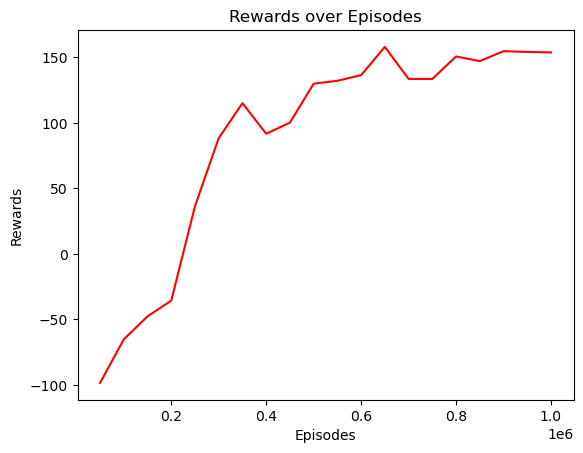

In [6]:
# Train and save the model
if not os.path.exists(BASE_MODEL_CKPT+".zip"):
    base_model.learn(total_timesteps=TRAIN_TIMESTEPS, callback=base_model_callback)
    base_model.save(BASE_MODEL_CKPT)

if not os.path.exists(SAFE_MODEL_CKPT+".zip"):
    safe_model.learn(total_timesteps=TRAIN_TIMESTEPS, callback=safe_model_callback)
    safe_model.save(SAFE_MODEL_CKPT)

## 5. Evaluate Expert Policies

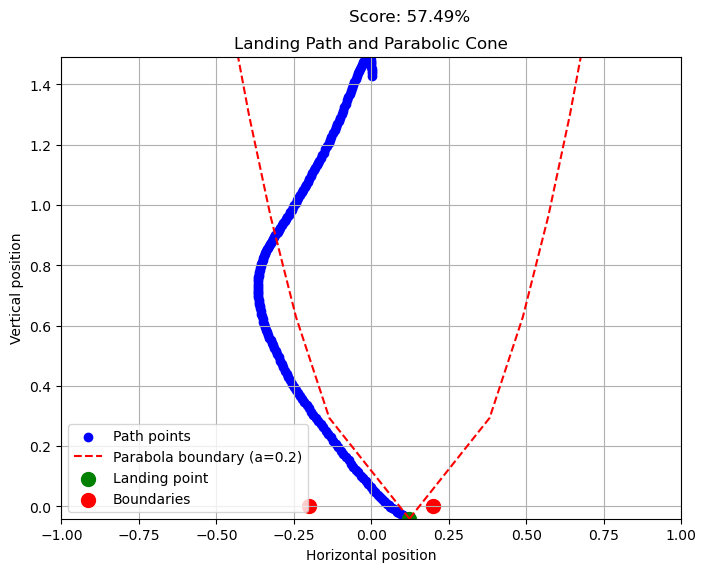

Video saved as videos/base_expert.mp4


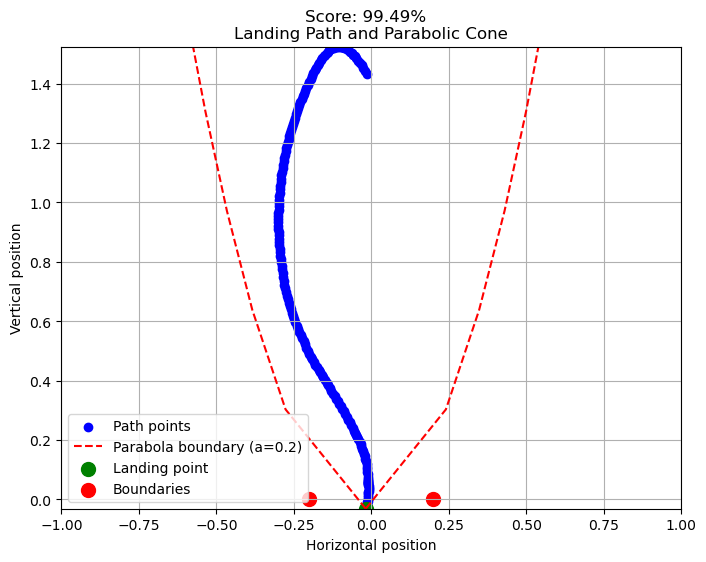

Video saved as videos/safe_expert.mp4


In [7]:
# Testing both policies in new environment with wind to test if they transferred learning of safe constraints
reseed(SEED)

vec_env_wind_1 = make_vec_env('LunarLander-v2', n_envs=1, wrapper_class=SafeLunarLanderWrapper, env_kwargs={"enable_wind": True, "wind_power": WIND_POWER}, wrapper_kwargs={"debug": True}) 

base_expert_actor = PPOActor(ckpt=BASE_MODEL_CKPT, environment=vec_env_wind_1)
safe_expert_actor = PPOActor(ckpt=SAFE_MODEL_CKPT, environment=vec_env_wind_1)

visualize(vec_env_wind_1, algorithm=base_expert_actor, video_name=BASE_ACTOR_VIDEO) # Visualize the base expert on the wind environment
visualize(vec_env_wind_1, algorithm=safe_expert_actor, video_name=SAFE_ACTOR_VIDEO) # Visualize the safe expert on the wind environment

## 6. Additional Learning on Wind Environment

In [ ]:
reseed(SEED)
vec_env_wind_10 = make_vec_env('LunarLander-v2', n_envs=10, env_kwargs={"enable_wind": True, "wind_power": WIND_POWER})

safe_wind_model = PPO.load(SAFE_MODEL_CKPT, vec_env_wind_10, verbose=1)
safe_wind_model_callback = PPOCallback(save_path=SAFE_MODEL_CKPT + "_wind", eval_env=vec_env_wind_1, save_path_plot=SAFE_LEARN_PLOT + "_wind")

base_wind_model = PPO.load(BASE_MODEL_CKPT, vec_env_wind_10, verbose=1)
base_wind_model_callback = PPOCallback(save_path=BASE_MODEL_CKPT + "_wind", eval_env=vec_env_wind_1, save_path_plot=BASE_LEARN_PLOT + "_wind")

wind_model = PPO("MlpPolicy", vec_env_wind_10, verbose=1) # Base Environment
wind_model_callback = PPOCallback(save_path=WIND_MODEL_CKPT, eval_env=vec_env_wind_1, save_path_plot=WIND_LEARN_PLOT)

# Addtional Learning on Wind Environment
if not os.path.exists(SAFE_MODEL_CKPT + "_wind.zip"):
    safe_wind_model.learn(total_timesteps=ADDITIONAL_TRAIN_TIMESTEPS, callback=safe_wind_model_callback)
    safe_wind_model.save(SAFE_MODEL_CKPT + "_wind")

if not os.path.exists(BASE_MODEL_CKPT + "_wind.zip"):
    base_wind_model.learn(total_timesteps=ADDITIONAL_TRAIN_TIMESTEPS, callback=base_wind_model_callback)
    base_wind_model.save(BASE_MODEL_CKPT + "_wind")
    
if not os.path.exists(WIND_MODEL_CKPT + ".zip"):
    wind_model.learn(total_timesteps=TRAIN_TIMESTEPS, callback=wind_model_callback)
    wind_model.save(WIND_MODEL_CKPT)
    
# safe_wind_model.learn(total_timesteps=ADDITIONAL_TRAIN_TIMESTEPS, callback=safe_wind_model_callback)
# base_wind_model.learn(total_timesteps=ADDITIONAL_TRAIN_TIMESTEPS, callback=base_wind_model_callback)
# wind_model.learn(total_timesteps=TRAIN_TIMESTEPS, callback=wind_model_callback)

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 209      |
|    ep_rew_mean     | -39.8    |
| time/              |          |
|    fps             | 3865     |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 20480    |
---------------------------------


## 7. Evaluate Additional Learning on Wind Environment

In [ ]:
reseed(SEED)

safe_expert_wind_actor = PPOActor(ckpt=SAFE_MODEL_CKPT + "_wind", environment=vec_env_wind_1)
base_expert_wind_actor = PPOActor(ckpt=BASE_MODEL_CKPT + "_wind", environment=vec_env_wind_1)
wind_actor = PPOActor(ckpt=WIND_MODEL_CKPT, environment=vec_env_wind_1)

visualize(vec_env_wind_1, algorithm=safe_expert_wind_actor, video_name=SAFE_ACTOR_VIDEO + "_wind")
visualize(vec_env_wind_1, algorithm=base_expert_wind_actor, video_name=BASE_ACTOR_VIDEO + "_wind")
visualize(vec_env_wind_1, algorithm=wind_actor, video_name=WIND_ACTOR_VIDEO)

## 8. Results

In [ ]:
import matplotlib.pyplot as plt

_, base_safety_scores = evaluate_policy(base_expert_wind_actor, environment=vec_env_wind_1, num_episodes=50)
_, safe_safety_scores = evaluate_policy(safe_expert_wind_actor, environment=vec_env_wind_1, num_episodes=50)
_, wind_safety_scores = evaluate_policy(wind_actor, environment=vec_env_wind_1, num_episodes=50)

x = [x for x in range(len(base_safety_scores))]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(x, base_safety_scores, label='Base Expert in Wind', marker='o')  # Plot the first line
plt.plot(x, safe_safety_scores, label='Safe Expert in Wind', marker='s')  # Plot the second line
plt.plot(x, wind_safety_scores, label='Expert in Wind', marker='x')  # Plot the third line

# Adding titles and labels
plt.title('Safe Reinforcement Learning')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
good = [x for x in base_safety_scores if x > -100]
print("Success", len(good))
print("Avg success", sum(good)/len(good))

In [ ]:
good = [x for x in safe_safety_scores if x > -100]
print("Success", len(good))
print("Avg success", sum(good)/len(good))

In [ ]:
good = [x for x in wind_safety_scores if x > -100]
print("Success", len(good))
print("Avg success", sum(good)/len(good))